In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = "svg"
from pymc3 import *
import arviz as az

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/avehtari/ROS-Examples/master/Congress/data/congress.csv")
data

,inc86,inc88,inc90,v86,v88,v90,v86_adj,v88_adj,v90_adj
0,1,1,1,0.745036,0.772443,0.714029,0.745036,0.772443,0.714029
1,1,1,1,0.673845,0.636182,0.597050,0.673845,0.636182,0.597050
2,1,1,0,0.696457,0.664928,0.521043,0.696457,0.664928,0.521043
3,-1,-1,-1,0.464590,0.273834,0.234377,0.464590,0.273834,0.234377
4,-1,-1,0,0.391095,0.263613,0.477439,0.391095,0.263613,0.477439
...,...,...,...,...,...,...,...,...,...
430,1,0,1,0.726371,0.763288,0.750401,0.726371,0.763288,0.750401
431,-1,-1,-1,0.347979,0.291337,0.437871,0.347979,0.291337,0.437871
432,-1,-1,-1,0.421110,0.373454,0.480790,0.421110,0.373454,0.480790
433,0,-1,0,0.387486,0.440967,0.607843,0.387486,0.440967,0.607843


In [ ]:
# make new columns for the catagorical variable
inc88_cat= []
inc90_cat= []
inc88 = data["inc88"].values
inc90 = data["inc90"].values
for k in range(len(inc88)):
  if inc88[k] == 0:
    inc88_cat.append("open")
  elif inc88[k] == -1:
    inc88_cat.append("rep")
  elif inc88[k] == 1:
    inc88_cat.append("dem")

  if inc90[k] == 0:
    inc90_cat.append("open")
  elif inc90[k] == -1:
    inc90_cat.append("rep")
  elif inc90[k] == 1:
    inc90_cat.append("dem")


data["inc90_cat"] = inc90_cat
data["inc88_cat"] = inc88_cat

Text(0.5, 0, 'vote share')

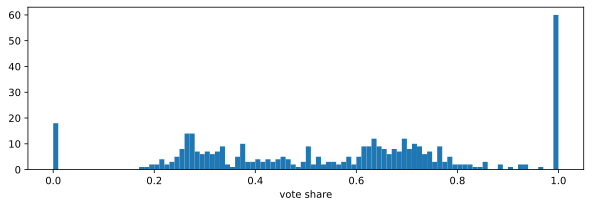

In [ ]:
fig,ax = plt.subplots(figsize=(10,3))
ax.hist(data.v88,100);
ax.set_xlabel("vote share")

Text(0.5, 0, 'vote share')

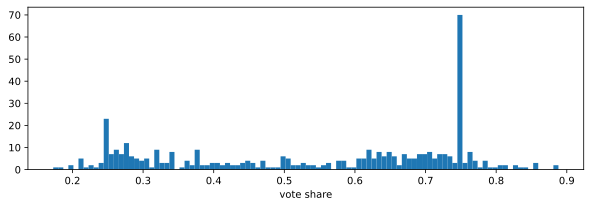

In [ ]:
fig,ax = plt.subplots(figsize=(10,3))
ax.hist(data.v88_adj,100);
ax.set_xlabel("vote share")

**Exercises**

These exercises are inspired by section 10.6 in the textbook, although we treat the incumbeny variable differently). 

1.1 
Suppose we want to model the outcome of elections with the following model
\begin{equation}
y = \beta_0 + \beta_1 x_{\rm prev} + \beta_2 x_{\rm open} + \beta_3 x_{\rm rep} + \epsilon
\end{equation}
where $x_{\rm prev}$ is the vote share from the previous election, $x_{\rm open}$ is $1$ if the seat is open and $0$ otherwise, and $x_{\rm rep}$ is $1$ if the incumbent is a republican and $0$ otherwise.
For each of the coefficients $\beta$, can you give the interpretation (just as we did in class for the kid's scores model and the model of weight).

1.2 Fit the parameters in this linear regression model with statsmodels using the vote shares from the $1986$ vote shares and $1988$ incumbency information as predictors, and the $1988$ vote shares as your response variable. Note that you will need to create "dummy" variables from the catagorical variable `inc88_cat` using the function `pd.dummy`. The following lines of code make the matrix $X$ of predictor variables in the correct format for statsmodels:

```
data_new = pd.get_dummies(data,["inc88_cat","inc90_cat"],drop_first=True)
data_x = data_new[["v86_adj","inc88_cat_open","inc88_cat_rep"]]
X = sm.add_constant(np.array(data_x))
```



1.3 For each of the congressional districts, predict the average, or expected, vote share using the fitted model. (that is, make noise-free predictions for $y$.) To do this, you will use the vote share from the $1988$ election and the incumbency data for $1990$ to get your $x$ values. You will want to make a matrix $X$ where the rows are the predictors for each district, similar to how $X$ is created in the code above. Remember, you can then get the predictors for the $i$th district using the code 

```
x_preds = X[i]
```



##1.1: 
*   $\hat{\beta}_0$ is the intercept is the outcome of an election if the previous election had a vote share of 0, the seat is open, and if the incumbent is not Republican. 
*   $\hat{\beta}_1$ (as we said above) is the predicted average difference in vote share out of 100 of the candidate when the previous election changed by 1 percent **but have the same open seat (or not) and the same incumbent party (Republican or not)**
* $\hat{\beta}_2$ is the predicted average difference in vote share of the candidate when there is an open or closed seat **but have the same previous election vote share and incumbent party (Republican or not)**
* $\hat{\beta}_2$ is the predicted average difference in vote share of the candidate when there is a Republican or Democratic incumbent **but have the same previous election vote share and open or closed seat (both open or both closed)**
* $\hat{\sigma}$ is the standard deviation of the variation in vote shares with the same precious vote share, incumbent party, or open or closed seat (both open or both closed). 

##1.2

In [ ]:
data_new = pd.get_dummies(data,["inc88_cat","inc90_cat"],drop_first=True)
data_x = data_new[["v86_adj","inc88_cat_open","inc88_cat_rep"]]
X = sm.add_constant(np.array(data_x))
# predictor response variable
y = data["v88_adj"]

model = sm.OLS(y,X)
results = model.fit()
beta0, beta1, beta2, beta3=results.params
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                v88_adj   R-squared:                       0.877
Model:                            OLS   Adj. R-squared:                  0.876
Method:                 Least Squares   F-statistic:                     1022.
Date:                Sat, 05 Mar 2022   Prob (F-statistic):          1.78e-195
Time:                        00:48:32   Log-Likelihood:                 540.24
No. Observations:                 435   AIC:                            -1072.
Df Residuals:                     431   BIC:                            -1056.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2765      0.022     12.665      0.0

In [ ]:
sigma_fit = np.sqrt(results.mse_resid)
sigma_fit

0.07021152175638459

This tells us the fitted model is 
\begin{equation}
y = 0.27 + 0.60x_{\rm prev}  -  0.09x_{\rm open} -  0.15x_{\rm rep} + \epsilon
\end{equation}
where $\epsilon \sim {\rm Normal}(0,0.07)$. 

##1.3

[0.74120726 0.65922914 0.67652387 0.28263902 0.27648975 0.31895222
 0.6568188  0.32118479 0.22180503 0.72770513 0.72770513 0.69950808
 0.72770513 0.69588318 0.72770513 0.76040299 0.72770513 0.67760541
 0.76270555 0.35646201 0.37552026 0.54341027 0.28560702 0.37193248
 0.68268335 0.69932281 0.67656532 0.59008821 0.32087321 0.26106768
 0.64719973 0.27065385 0.72770513 0.68260862 0.69996474 0.29548815
 0.29924681 0.30150533 0.69004938 0.58206811 0.6473675  0.62830831
 0.2878753  0.32136642 0.72770513 0.72770513 0.72770513 0.63411532
 0.76676619 0.72770513 0.72770513 0.72590453 0.33869263 0.34320915
 0.483709   0.78405538 0.72770513 0.58791681 0.42744131 0.26178794
 0.28247306 0.5543756  0.28404527 0.26829977 0.26805171 0.43620787
 0.72770513 0.2855786  0.63156929 0.46333576 0.71400778 0.72770513
 0.33330268 0.73561777 0.72770513 0.65678805 0.6994341  0.2489987
 0.65919534 0.31152356 0.62409545 0.483709   0.2788689  0.72770513
 0.72770513 0.31901153 0.74960023 0.37372596 0.27444478 0.48370

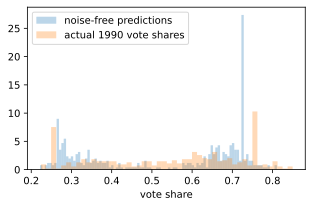

In [ ]:
#1.3
data_new = pd.get_dummies(data,["inc88_cat","inc90_cat"],drop_first=True)
data_x = data_new[["v88_adj","inc90_cat_open","inc90_cat_rep"]]
X = sm.add_constant(np.array(data_x))

# generates vote share for each congressional district
avg=[]
for i in range(434):
  x_preds = X[i]
  y_pred = beta0 + x_preds[1]*beta1 + x_preds[2]*beta2 + x_preds[3]*beta3
  avg.append(y_pred)

# prints the predected vote share
print(np.array(avg))

# plots tour predicted vote share vs actual vote share for 1990
fig,ax = plt.subplots(figsize=(5,3))
ax.hist(avg,100,alpha=0.3,density=True,label="noise-free predictions");
ax.hist(data["v90_adj"],50,alpha=0.3,density=True,label="actual 1990 vote shares");
ax.set_xlabel("vote share")
ax.legend()

## 2.1 
Consider the follow data set:

```
x1 = np.array([0,1,2,3,4,5])
x2 = np.array([0.1,0.5,2.05,2.8,4.1,5.1])
y = np.array([7,6,6.5,3.8,3.2,-1])
```


Use pymc to sample from the posterior distribution and make a scatter plot of $\beta_1$ vs. $\beta_2$. You can use the following priors:
\begin{align}
\ln\sigma &\sim {\rm Normal}(-1,4)\\
\beta_0 &\sim {\rm Normal}(10,5)\\
\beta_1 &\sim {\rm Normal}(0,5)\\
\beta_2 &\sim {\rm Normal}(0,5)\\
\end{align}
What do you notice about the posterior? What is it about this dataset that makes it look this way? 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  app.launch_new_instance()
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [beta2, beta1, beta0, lnsigma]


Sampling 2 chains for 1_000 tune and 2_500 draw iterations (2_000 + 5_000 draws total) took 20 seconds.
There were 807 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.4094786461463521, but should be close to 0.8. Try to increase the number of tuning steps.
There were 1060 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7188463421492713, but should be close to 0.8. Try to increase the number of tuning steps.
The estimated number of effective samples is smaller than 200 for some parameters.
Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the 

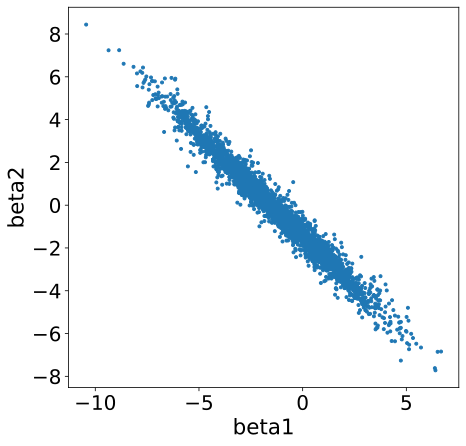

In [ ]:
# 2.1
x1 = np.array([0,1,2,3,4,5])
x2 = np.array([0.1,0.5,2.05,2.8,4.1,5.1])
y = np.array([7,6,6.5,3.8,3.2,-1])

lin_regression = Model()
with lin_regression:  
  # we have four paramaters
  lnsigma = Normal("lnsigma", -1, 4)
  beta0 = Normal("beta0",10,5)
  beta1 = Normal("beta1",0,5)
  beta2 = Normal("beta2",0,5)

  # the likelihood function for the given parameters
  likelihood = Normal("y", beta0 + beta1*x1 + beta2*x2, np.exp(lnsigma), observed=y)
  trace = sample(2500)

# only show beta1 vs beta2
az.plot_pair(trace,var_names = ["beta1", "beta2"],figsize=(7,7)) 
plt.show()


We notice that beta1 and beta2 are very much correlated. Thus, we can roughly predict beta1 if we know beta2 and vice versa. In addition, it is a negative correlation, because x1 and x2 are pretty similar. Thus, if beta1 increases, then beta2 needs to decrease in order to maintain the same y value. If beta1 decreases, then beta2 needs to increase to maintain the same y value.


## 3.1 
Let's imagine we are testing how effectively a drug kills bacteria. To do so, we perform experiments in which colonies of bacteria are treated with some drugs and the fraction of bacteria remaining after the treatment is measured. We perform 3 experiments, each of which is replicated $7$ times. In the first experiment, the bacteria are treated with only drug $A$, in the second they are treated with only drug $B$ and in the third they are treated with both drugs. 


Write down a linear regression model with an interaction term to model the efficacy of the two drugs. Give the interpretation of each $\beta$ term in the model. 



Our model is now 
\begin{equation}
y = \beta_0 + \beta_1 x_A + \beta_2 x_B + \beta_3 x_Ax_B + \epsilon.
\end{equation}

Assuming x_A and x_B only take on the values 0 and 1.
Beta0 is the fraction of bacteria remaining if treated with no drugs.
Beta1 is the average difference in the fraction of bacteria remaining if drug A is used compared to using no drugs or both drugs.
Beta2 is the average difference in the fraction of bacteria remaining if drug B is used compared to using no drugs or both drugs.
Beta3 shows the effect of drug A given that drug B was also used. Furthermore, Beta3 is the average difference in the xA vs y slope between subsamples who differ whether or not drug B was used.



## 4.1 
Simulate the toy model of COVID cases for $20$ days, plot a histogram of the number of cases and describe what aspects of the histogram suggest a Normal distribution is a poor approximation in this case. 

Text(0.5, 0, 'Covid cases after 20 days')

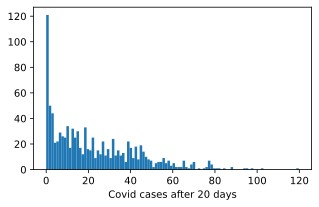

In [ ]:
y = [] # keeps track of covid cases per day

for i in range(1000):
  starting = 0 # starting cases are 0
  for j in range(20): # for each day 
    rand = np.random.rand(1) # generates a random seed
    if rand <= 0.1: # if it is below or equal to 0.1
      starting = starting + 1 # increase the starting value
    starting=starting*1.2 # increment by 1.2
  y.append(starting)

fig,ax = plt.subplots(figsize=(5,3))
ax.hist(y,100);
ax.set_xlabel("Covid cases after 20 days")

This is not a normal distribution because it is skewed heavily towards 0, and here, there cannot be any negative cases. Meanwhile, a normal distribution is symmetrical and can take on any values.